In [9]:
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
import daniel_utils as du
from pandas import *
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import KFold


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Import data

df = read_csv(filepath_or_buffer="csv/london.csv", header=0)

df = du.process_df(df)

In [11]:
RANDOM_STATE = 123

y = df['L_PREOVULATION'].values

df = df.drop({'ID', 'GROUP_ID', 'CYCLE_ID', 'BIRTH_YR', 'BEGIN_DATE', 'N_GROUPS', 'N_CYCLES', 'DESC', 'TEMP_SCALE', 'CHILDREN'}, axis = 1)
X = df.drop({'L_CYCLE', 'L_PREOVULATION', 'L_PERIOD'}, axis = 1)

# # Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                            n_clusters_per_class=1, n_informative=15,
#                            random_state=RANDOM_STATE)

In [12]:
# impute missing data
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
X = imp.fit_transform(X)

In [13]:
def yhat_process(yhat):
    yhat[yhat<0]=0
    yhat[yhat>50]=50
    return yhat

In [14]:
kf = KFold(len(y), n_folds = 10)


In [15]:
data = []

In [16]:
for i in range(20, 80):
    yhat_rf = cross_val_predict(RandomForestRegressor(n_estimators=i), X,y=y, cv=kf)
    yhat_rf = yhat_process(yhat_rf)
    data.append((yhat_rf-y).std())
    if(i%5==0):
        print(i)

20
25
30
35
40
45
50
55
60
65
70
75


In [18]:
data

[2.1560347291619273,
 2.1422075794861963,
 2.1435216066812868,
 2.1429300466114709,
 2.1392153290809204,
 2.1421172090970928,
 2.1382293475385863,
 2.1327651158106327,
 2.1349884050049743,
 2.1314147297955834,
 2.1313640303990731,
 2.1286345524952535,
 2.1222875078944852,
 2.1329581300847327,
 2.1244372070044957,
 2.1173577805602548,
 2.1308455987742998,
 2.1172662270510947,
 2.1246554756079234,
 2.1288000539318945,
 2.1165207318776273,
 2.1236194218566156,
 2.113320264159674,
 2.1215650338630634,
 2.1220949250351566,
 2.1291197990632194,
 2.1146817545196552,
 2.1153491305135637,
 2.1116532198334221,
 2.1170417039987632,
 2.1279228318694217,
 2.1115229436032141,
 2.1210365186533853,
 2.1121795433830908,
 2.1196859073509642,
 2.1095472874383137,
 2.1113921925812855,
 2.1136516916063703,
 2.1026926941241029,
 2.106775577930688,
 2.1119331204370604,
 2.1075934990494001,
 2.1152978113848588,
 2.1104302482282189,
 2.1065657438106173,
 2.1115185061095456,
 2.1077303530697633,
 2.110796540506

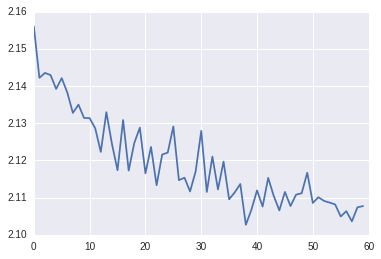

In [20]:
plt.plot(data)
plt.labels